
# Code Intent Prediction
## With Applied Machine Learning Techniques
***
### Justin Hugh
#### Data Science Diploma Candidate, BrainStation
##### December 18, 2020

***

## Table of Contents
#### [ 1.0 - Introduction](#1.0---Introduction)
- [ 1.1 - Problem](#1.1---Problem)

#### [ 2.0 - Background](#2.0---Background)
- [ 2.1 - Stack Overflow](#2.1---Stack-Overflow)
- [ 2.2 - Packages and Libraries](#2.2---Packages-and-Libraries)

#### [ 3.0 - Limitations and Assumptions](#3.0---Limitations-and-Assumptions)

#### [ 4.0 - The Data](#4.0---The-Data)
- [ 4.1 - Sources of Data](#4.1---Sources-of-Data)  
    - [ 4.1.1 - CoNaLa](#4.1.1---CoNaLa)
    - [ 4.1.2 - Other Sources of Data](#4.1.2---Others-Sources-of-Data)

#### [ 5.0 - Exploratory Data Analysis](#5.0---Exploratory-Data-Analysis)  
- [ 5.1 - Importing Data](#5.1---Importing-Data)   
    - [ 5.1.1 - Importing CoNaLa Competition Data](#5.1.1---Importing-CoNaLa-Competition-Data)
        - [ 5.1.1.1 - Importing CoNala Training Data](#5.1.1.1---Importing-CoNaLa-Training-Data)
        - [ 5.1.1.2 - Importing CoNaLa Test Data](#5.1.1.2---Importing-CoNaLa-Test-Data)
- [ 5.2 - DataFrames from CoNaLa Competition Data](#5.2---DataFrames-from-CoNaLa-Competition-Data)
- [ 5.3 - Input and Target](#5.3---Input-and-Target)
- [ 5.4 - Pickling Data](#5.4---Pickling-Data)
- [ 5.5 - CoNaLa Mined Data](#5.5---CoNaLa-Mined-Data)

#### [ 6.0 - Modelling Approaches](#6.0---Modelling-Approaches)

#### [ 7.0 - Preprocessing](#7.0---Preprocessing)
- [ 7.1 - Separating Input and Target](#7.1---Separating-Input-and-Target)
- [ 7.2 - Preparing for Tokenization](#7.2---Preparing-for-Tokenization)
    - [ 7.2.3 - Helper Functions](#7.2.3---Helper-Functions)
        - [ 7.2.3.1 - List Splitting Helper Function](#7.2.3.1---List-Splitting-Helper-Function)  
- [ 7.3 - Vectorizing Text Data](#7.3---Vectorizing-Text-Data)
 

#### [ 8.0 - Modelling and Analysis](#8.0---Modelling-and-Analysis)
- [ 8.1 - Seq2Seq Discussion](#8.1---Seq2Seq-Discussion)
- [ 8.2 - Implementing Seq2Seq](#8.2---Implementing-Seq2Seq)
- [ 8.3 - Training the Seq2Seq Model](#8.3---Training-the-Seq2Seq-Model)
- [ 8.4 - Predicting a Target Sequence](#8.4---Predicting-a-Target-Sequence)
- [ 8.5 - Prediction for Custom Data](#8.5---Prediction-for-Custom-Data)

#### [ 9.0 - Discussion](#9.0---Discussion)
#### [ 10.0 - Next Steps](#10.0---Next-Steps) 

#### [ 11.0 - Conclusion](#11.0---Conclusion)

#### [ 12.0 - References](#12.0---References)

***

# 1.0 - Introduction
[[Back to TOC]](#Table-of-Contents)

This report and project have been conducted as a final requirement and submission for the BrainStation Data Science Bootcamp. I participated in the Toronto Fall 2020 cohort. The duration of this project was about 5 weeks of development, ending December 20, 2020. 

This workbook constitutes only the code required to conduct the final approach which was taken in order to address the problem. A wide range of exploration and alternative preprocessing/modelling approaches were conducted, but these have been excluded from this notebook for brevity. Supplementary information is provided alongside this notebook which speaks to these other conducted approaches.

## 1.1 - Problem
[[Back To TOC]](#Table-of-Contents)

Software and code are becoming present nearly everywhere in our daily lives both personal and professional. Whether it helps us accomplish complex and massive tasks, or powers the applications and products we rely on, the digital world is expanding. Yet, only a fraction of us are literate in code, and even among those of us who are, there are a wide range of languages and frameworks so no one is familiar with it all, and mistakes or misinterpretations can be made even on languages we're familiar with. 

I propose a model which could predict the intent or purpose of a sample of code. A tool like this would helpful in understanding more of the world around us and would be hugely impactful for:  
- Education. Making code more accessible and interpretable.  
- Security. Identifying code with malicious intent.  
- Development. Providing contextual tooltips, suggestions, resources.   

The goal of this project is to develop an ML model which employs NLP tools to interpret a samples of code and make a prediction as to its intent.

***

# 2.0 - Background
[[Back To TOC]](#Table-of-Contents)

Currently, there are no commercialized or productized options available to a programmer who is looking to understand code that they are unable to interpret, whether in an academic, professional, or hobbyistic setting. 

For this project, I conducted preliminary research in order to find alternatives or studies on the topic, and while some others have begun study on this problem, it seems that state of the art applications in the field can perform well in translating python code to pseudocode [[1]](#References). However at the moment there is no high-performing model, or model that can convert the code into an English description. This difficulty occurs because the structure and syntax of the two types of text (code and intent) are quite different from one another, whereas this difference is less pronounced between code and pseudocode. Being able to create pseudocode is a wonderful start to the problem, but is insufficient for my goal in making code more accessible. For many hobbyists or even professionals who do not program as their main function, pseudocode will not be a familiar or fully interprable format.

This will clearly be a difficult task, but I'm looking forward to learning and sharing more about the problem space in hopes of moving towards my goal myself, or sharing learning with others so that they can make their own progress on the matter.

Natural Language Processing (NLP) Models have seen very large recent acceleration as a result of the success of smart assistants, as well as the commoditization of computing power. With this, support for very powerful libraries and approaches in language modelling are widely available, and there is extensive research on the topic. Because there are so many resources in the area, and because there continues to be a heavy amount of momentum, this is a great time to apply these techniques to my difficult problem space.

Below I'll discuss other contexts surrounding the problems I'm tackling.

## 2.1 - Stack Overflow
[[Back To TOC]](#Table-of-Contents)

**Stack Overflow** is an online community for programmers [[2]](#References). The website provides a question and answer experience in which programmers can submit questions about how to accomplish various tasks or identify bugs in their code. Respondents to the queries are commonly other programmers who know of a solution or can provide helpful direction, often in the form of a code snippet. This website and service has become very widely popular and as a result hosts a large collection of code snippets, paired with a question/query. It is now one of the largest collections of coding knowledge online.

Much of the code examined and used in this project originally comes from a post on Stack Overflow.

## 2.2 - Packages and Libraries
[[Back To TOC]](#Table-of-Contents)

There's a wealth of openly available python packages and libraries which are indispensible in tackling Machine Learning problems. These are dependencies of this project and I'll import a number of those needed in this section.

In [1]:
# Libraries for general array/dataframe use
import numpy as np 
import pandas as pd 

# Libraries for data visualization with python
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function to help presentation of these visuals
%matplotlib inline

# Functions for saving and importing data
import pickle

# Data Processing/Transformation Packages
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

# Word Vectorization and Natural Language Processing Libararies
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

# Runtime tools and helpers
from tqdm import tqdm
import time 
import warnings
warnings.filterwarnings("ignore")

These libaries are quite commonly used and are all easily acquired with [ Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/macos.html) [[3]](#References)

***

# 3.0 - Limitations and Assumptions
[[Back To TOC]](#Table-of-Contents)

In this section I'll recognize some of the limitiations and assumptions to the modelling and analysis I will conduct below. Those listed here are generally applicable to the project at large. Any that are more specifically applicable to a certain step are discussed at that point in the analysis.

- Some of this data is not current. The main sources of the data comes from a competition which was conducted in 2018. Software changes quite quickly and frequently. My model and this system's performance may be less applicable to presently written code, and will deprecate over time as libraries and languages are updated and the language, or prevalence of various functions adjusts to this.

- I assume the data set originating from the competition training data does not have known significant errors, such as incorrect application of code or erroneous syntax. If these are present in abundance, then this system's performance will have "learned" incorrect code application.  

- Developers are not uniquely identified in the data I've used. Not having this information restricts me from making more deep insights into code and intent on a developer-by-developer level which could potentially mean more accurate interpretations. Different developers can accomplish the same task by coding with quite different styles. However, not uniquely identifiying the developers is a good and necessary practice from a privacy and standpoint. If developers were uniquely identified in the data, this could potentially be used to reconstruct personal data, constituting a notable privacy concern.

- The amount of data that is used and analyzed in this project is quite restricted. This is largely as a result of limitations of computing resources and time. As a next step in this project, one of the first considerations should be expanding the amount of data analyzed.

***

# 4.0 - The Data
[[Back To TOC]](#Table-of-Contents)

This section will include notes about the sources of data used as inputs in this project. Where the data comes from, its characteristics, and how I intend to use it.

## 4.1 - Sources of Data
[[Back To TOC]](#Table-of-Contents)

To acquire the data used in this project, I conducted research, seeking sets of annotated code snippets. I found a good number of resources with much code available, but with varying characteristics. On one hand, I was able to find some well-structured and cleaned data, and on the other, I found large quantities of stored code, but either poorly formatted, or more difficult to process. 

I'll discuss below where I obtained the data.

### 4.1.1 - CoNaLa
[[Back To TOC]](#Table-of-Contents)

[_The Code/Natural Language Challenge (CoNaLa)_](https://conala-corpus.github.io/#dataset-information) is a challenge that was created by [_Carnegie Mellon University (CMU)_](https://www.cmu.edu/) along with [_NeuLab_](http://www.cs.cmu.edu/~neulab/) and [_STRUDEL Lab_](https://cmustrudel.github.io/) on May 31, 2018 in order to test systems for generating programs from natural language [[4]](#References). The original intent was to - given an english input such as "sort list x in reverse order" - have a system output such as `x.sort(reverse=True)` in Python. 

_CoNaLa_ is a competition with no end date, and the data are offered for use within the challenge itself, but also licensed for any other research on the intersection of code and natural languague, a use case which this project falls nicely into.

_CoNaLa_ provides a wealth of publicly available data which is well suited for the needs of this project including: 
- Training Data: Data crawled from _Stack Overflow_ with 2,379 training examples.
    - These data include user submitted queries, the corresponding code responses by other users on Stack Overflow. Each of these has been manually annotated with a revised intent field (the query rewritten to be more clear) by volunteers for the _CoNaLa_ competition.
- Test Data: 500 test examples. These have been curated by annotators.
    - These data were separated from the training data so that competitors could test their code with the same set. These are in the same format as the training data.
- Mined Data: Automatically-mined data with 600,000 examples. 
    - _CoNaLa_ also provides extra data to be considered if participants are interested. These were automatically scraped from Stack Overflow in pairs of query, and response. However, the quality and accuracy of the responses are not verified at all. Thus, there is no revised intent field.
    - A "probability" is provided with these data. This score was progammatically generated by the scraping protocol and indicates the level of relevance the scraped intent field (query) has to the code response.
- Links to other helpful and similar data sets:
    - [Django Dataset](https://ahcweb01.naist.jp/pseudogen/)  
    - [StaQC](https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset) 
    - [Code Docstring Corpus](https://github.com/EdinburghNLP/code-docstring-corpus)
        - These are simply links to other places were large amounts of code can be found, so very little cleaning or confirmation of its quality has been conducted. 

### 4.1.2 - Others Sources of Data
[[Back To TOC]](#Table-of-Contents)

Through the course of working on this project, it became quickly apparent when beginning to preprocess and preliminarily model with the data that I needed to work with a small sample of data. This is because the computing resources I had access to were restricted, and in order to complete the study within time constraints, I needed my models to train quickly, and without tying up large amounts of memory. For this reason, the CoNaLa Training Data and CoNaLa Test data discussed above were the only data sets which are used below. A priority next step to this project will be to acquire and clean a wider set of data and transfer the approach generated in this report to more data.

I've done a wealth of work in finding other sets of data that would be appropriate to incorporate in the future. These are left out of this report for brevity, but provided in the companion markdown file `other_data_sources.md`

I also made the decision to not include the CoNaLa Mined data further in this report after extensive exploration was conducted on that data. From that exploration I found that the data was for the most part of low quality that would harm or not improve the results of this report. Examples of the exploration conducted on this data and discussion on findings are included in the provided notebook, `conala_mined_data.ipynb`. 

***

# 5.0 - Exploratory Data Analysis
[[Back To TOC]](#Table-of-Contents)

The purpose of Exploratory Data Analysis (EDA) step is to familiarize myself with the data and determine whether it has missing values or other deficiencies. This step is also an opportunity to clean the data so it may be analyzed further, and peek at some of the more immediately evident insights of the data and parameters I'm working with. By the end of these activities, I'll have a cleaned set of data which is prepared for modelling and deeper analysis. 

## 5.1 - Importing Data
[[Back To TOC]](#Table-of-Contents)

Before conducting exploration, I'll have to load in the data to this notebook. The data I use below all came from the _CoNaLa_ competition introduced above, and so a singular approach for loading the data will be sufficient. In this section I'll outline the method I used for doing this. I'll also conduct the data import itself.

### 5.1.1 - Importing CoNaLa Competition Data
[[Back To TOC]](#Table-of-Contents)


Recall from the [**CoNaLa Section**](#CoNaLa) above, the Competition data is comprised of data crawled from Stack Overflow with 2,379 training examples, and 500 test examples. The data has been made conveniently available. 

This data can be accessed through direct downloaded by clicking this link: [CoNaLa Corpus v1.1 (.zip file, 52.1 MB)](http://www.phontron.com/download/conala-corpus-v1.1.zip). It's also linked on the [CoNaLa Competition Page](https://conala-corpus.github.io/).

This download produces a compressed `.zip` file. Once unzipped, the folder contians the data with training examples and the test examples stored in separate folders. Accordingly, I've loaded each of these into this notebook in a saparate step.

In order for the data to be loaded for use with this notebook, and for organization, the corresponding data has been moved into the `data` folder in the same directory as this notebook.

#### 5.1.1.1 - Importing CoNaLa Training Data
[[Back To TOC]](#Table-of-Contents)


I'll start first with the training data.

This data is provided in the format of a .json file, in a set of subfolders. I peeked at the data by opening the json file and viewing the text contained. A preview of what the data looks like is included below:

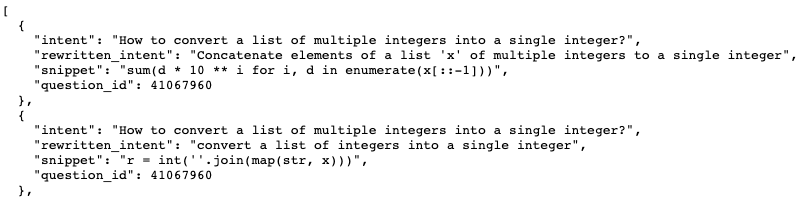

This looks like the data is contained in a list of JSON objects. This is great news, since this format is quite friendly for use with the `pandas` library. This will allow for conversion of this data into a DataFrame format which can be worked with in the upcoming process of data munging.

Knowing this, I can construct my data extraction process accordingly.

In [2]:
# CoNaLa Training Data

# Open the json file, handle with `with` statement so the file is closed once finished
# load the contents which are contained as a json object.
with open('data/conala-corpus/conala-train.json') as f:
    # Instantiate conala_train_data to hold the data.
    conala_train_data = json.load(f)

In [3]:
# Peek at the loaded data
conala_train_data

[{'intent': 'How to convert a list of multiple integers into a single integer?',
  'rewritten_intent': "Concatenate elements of a list 'x' of multiple integers to a single integer",
  'snippet': 'sum(d * 10 ** i for i, d in enumerate(x[::-1]))',
  'question_id': 41067960},
 {'intent': 'How to convert a list of multiple integers into a single integer?',
  'rewritten_intent': 'convert a list of integers into a single integer',
  'snippet': "r = int(''.join(map(str, x)))",
  'question_id': 41067960},
 {'intent': 'how to convert a datetime string back to datetime object?',
  'rewritten_intent': "convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'",
  'snippet': "datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')",
  'question_id': 4170655},
 {'intent': 'Averaging the values in a dictionary based on the key',
  'rewritten_intent': 'get the average of a list values for each key in dictionary `d`)',
  'snippet': '[(i, sum(j) / len(j)) for 

In [4]:
# Check number of json objects in the list.
len(conala_train_data)

2379

This variable successfully loaded the data in a similar format, that is as a list of json objects, or equivalently, a list of dictionaries. I'll move onto the Test data and take the same approach.

#### 5.1.1.2 - Importing CoNaLa Test Data
[[Back To TOC]](#Table-of-Contents)

Similarly, this data is provided in the format of a .json file, in a set of subfolders. I peeked at the data, and show a preview included below:

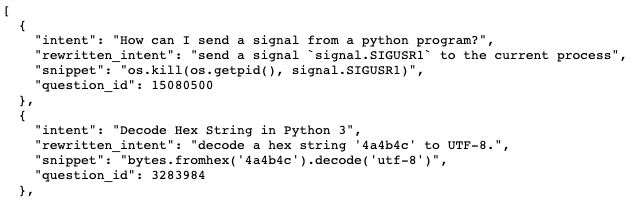

This is also a list of JSON objects.

In [5]:
# CoNaLa Test Data

# Open file with `with` statement.
with open('data/conala-corpus/conala-test.json') as f:
    # Instantiate conala_test_data to hold the data.
    conala_test_data = json.load(f)

In [6]:
# Peek
conala_test_data

[{'intent': 'How can I send a signal from a python program?',
  'rewritten_intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'question_id': 15080500},
 {'intent': 'Decode Hex String in Python 3',
  'rewritten_intent': "decode a hex string '4a4b4c' to UTF-8.",
  'snippet': "bytes.fromhex('4a4b4c').decode('utf-8')",
  'question_id': 3283984},
 {'intent': 'check if all elements in a list are identical',
  'rewritten_intent': 'check if all elements in list `myList` are identical',
  'snippet': 'all(x == myList[0] for x in myList)',
  'question_id': 3844801},
 {'intent': 'Format string dynamically',
  'rewritten_intent': 'format number of spaces between strings `Python`, `:` and `Very Good` to be `20`',
  'snippet': "print('%*s : %*s' % (20, 'Python', 20, 'Very Good'))",
  'question_id': 4302166},
 {'intent': 'How to convert a string from CP-1251 to UTF-8?',
  'rewritten_intent': None,
  'snippet': "d.decode('cp1251').en

In [7]:
# Check number of json objects in the list.
len(conala_test_data)

500

This was also successful.

### 5.2 - DataFrames from CoNaLa Competition Data
[[Back To TOC]](#Table-of-Contents)

In this section, I'll manipulate the data to be in a more workable format, namely a pandas DataFrame. Conveniently pandas includes a method `from_dict` which is able to ingest the json data in its current listed form and create a DataFrame from this.

With the data in a DataFrame, I also look at the `head()` of each, and confirm the shape of each.

In [8]:
# Create DataFrames from the CoNaLa train and test sets, both from a list of dictionary objects
conala_train_df = pd.DataFrame.from_dict(conala_train_data)
conala_test_df = pd.DataFrame.from_dict(conala_test_data)

# Peek at the dfs
display(conala_test_df.head())
display(conala_train_df.head())

# Check Shapes of dfs
print(conala_train_df.shape)
print(conala_test_df.shape)

,intent,rewritten_intent,snippet,question_id
0,How can I send a signal from a python program?,send a signal `signal.SIGUSR1` to the current ...,"os.kill(os.getpid(), signal.SIGUSR1)",15080500
1,Decode Hex String in Python 3,decode a hex string '4a4b4c' to UTF-8.,bytes.fromhex('4a4b4c').decode('utf-8'),3283984
2,check if all elements in a list are identical,check if all elements in list `myList` are ide...,all(x == myList[0] for x in myList),3844801
3,Format string dynamically,format number of spaces between strings `Pytho...,"print('%*s : %*s' % (20, 'Python', 20, 'Very G...",4302166
4,How to convert a string from CP-1251 to UTF-8?,None,d.decode('cp1251').encode('utf8'),7555335


,intent,rewritten_intent,snippet,question_id
0,How to convert a list of multiple integers int...,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))",41067960
1,How to convert a list of multiple integers int...,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))",41067960
2,how to convert a datetime string back to datet...,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...,4170655
3,Averaging the values in a dictionary based on ...,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items...",29565452
4,zip lists in python,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])",13704860


(2379, 4)
(500, 4)


We should also confirm the data types of each df.

In [9]:
conala_train_df.dtypes

intent              object
rewritten_intent    object
snippet             object
question_id          int64
dtype: object

In [10]:
conala_test_df.dtypes

intent              object
rewritten_intent    object
snippet             object
question_id          int64
dtype: object

The head records of each of these DataFrames are more or less in the format that is expected, and already in relatively clean condition as-is. 

The data types of each of the columns appears to be appropriate for the information it contains. 

The CoNaLa train data has 2379 records, with 4 features.
The CoNaLa test data has 500 records, with 4 features. This is good news because the test data needs to have the same dimensionality to be effectively used to assess the model.

I'll discuss each column in turn: 

- `intent`
    - This column represents the original query which was posted to Stack Overflow. This is the query that prompted the code snippet as a response. 
    - These data are stored as string objects. This is an appropriate datatype for storing an english question. 
    - These records are not optimal for our analysis compared ot the `rewritten intent` since most of these are questions rather than statements. A question is structured quite differently from a statement, and so using this as a field would introduce additionally complexity to the problem. 
- `rewritten_intent`
    - This column represents an intent which has been rewritten by volunteers for the CoNaLa competition. These records are provided in a form that is no longer a question but rather a statement, and language has been simplified to use more direct word choice.
    - These data are stored as string objects. This is again an appropriate datatype for storing english statements.
    - This column will be a better feature to use for our model as its formatting will be more easily related to the provided code snippets. 
- `snippet`
    - This column represents the code snippet which was provided as a response to the Stack Overflow query. 
    - These data are stored as string objects, this is an appropriate datatype for storing a sample of code. 
    - These records will be used as an input for the model. I will be predicting english intent based off of this field.
- `question_id` 
    - This is a unique identifier which Stack Overflow has included to differentiate posts from one another. For our purposes this is not a particularly useful field. 
    - This feature's type is `int64` which is appropriate for a unique identifier.

I wanted to view random samples of the data, in order to ensure that the formatting and data quality is consistent in the set. I accomplished this by running the below cell many multiple times and reviewing its output. 

In [11]:
# Get a random sample of 5 of the records in the conala_train_df. 
# Cell to be run multiple times.
conala_train_df.sample(5)

,intent,rewritten_intent,snippet,question_id
579,python: rename single column header in pandas ...,rename column 'gdp' in dataframe `data` to 'lo...,"data.rename(columns={'gdp': 'log(gdp)'}, inpla...",19758364
1839,How to send cookies in a post request with the...,send cookies `cookie` in a post request to url...,"r = requests.post('http://wikipedia.org', cook...",7164679
1107,python dict comprehension with two ranges,"convert the zip of range `(1, 5)` and range `(...","dict(zip(list(range(1, 5)), list(range(7, 11))))",18789262
432,Change a string of integers separated by space...,change a string of integers `x` separated by s...,"x = map(int, x.split())",19555472
509,How to pass through a list of queries to a pan...,get rows of dataframe `df` where column `Col1`...,"df[df.Col1.isin(['men', 'rocks', 'mountains'])]",39988589


Note that for some records, the string cannot be fully displayed in the output of this notebook as it may be too long. In order to view the entire string, I used the `.loc` function to output the contents of a single entry. 

An example follows: 

In [12]:
# Inspecting an intent which is too long to be viewed in the notebook output space. 
ind = 143 # index 143 as an example
print("Rewritten Intent:\n", conala_train_df.loc[ind,'rewritten_intent'], end="\n\n")
print("Snippet:\n",conala_train_df.loc[ind,'snippet'], end="\n\n")

Rewritten Intent:
 make a line plot with errorbars, `ebar`, from data `x, y, err` and set color of the errorbars to `y` (yellow)

Snippet:
 ebar = plt.errorbar(x, y, yerr=err, ecolor='y')



Once I'd gotten quite comfortable with the data by reviewing many samples, I then moved on to cleaning the data. 

First, I looked for duplicates.

In [13]:
# Looking for duplicates in the data.
print("Train df duplicates:", conala_train_df.duplicated().sum())
print("Test df duplicates:", conala_test_df.duplicated().sum())

Train df duplicates: 12
Test df duplicates: 6


These duplicates will only introduce bias into the model. Given that these are a small proportion of the data, these should be simply dropped. I've done so in the cell below. 

In [14]:
# Dropping duplicates from both dfs. 
conala_train_df.drop_duplicates(inplace=True)
conala_test_df.drop_duplicates(inplace=True)

# Sanity check with shape of dfs after dropping.
print(conala_train_df.shape)
print(conala_test_df.shape)

(2367, 4)
(494, 4)


I see that 12 and 6 records have been dropped from the DataFrames respectively. Great, it worked as intended.

Next we can check for `NaN` values in the DataFrames.

In [15]:
# Checking for NaNs in the train df
conala_train_df.isna().sum()

intent               0
rewritten_intent    79
snippet              0
question_id          0
dtype: int64

In [16]:
# Checking for NaNs in the test df
conala_test_df.isna().sum()

intent               0
rewritten_intent    23
snippet              0
question_id          0
dtype: int64

We have some `NaN` values. These need to be handled as they will cause issues in the modelling and analysis process. Again though I note that these are relatively small proportions of the provided data. I will simply drop these. 

In [17]:
# Dropping duplicates from both dfs. 
conala_train_df.dropna(inplace=True)
conala_test_df.dropna(inplace=True)

# Sanity check with shape of dfs after dropping.
print(conala_train_df.shape)
print(conala_test_df.shape)

(2288, 4)
(471, 4)


I see that 79 and 23 records have been dropped from the DataFrames respectively. Great this worked as intended.

### 5.3 - Input and Target
[[Back To TOC]](#Table-of-Contents)

Recall the task at hand which is to produce an english intent of provided snippets of code. From the exploring the data thus far we can see the two features which will constitute the input data and target following preprocessing. 

The `snippet` field will be preprocessed with NLP techniques and then will act as the input data for my model. 
The `rewritten_intent` field will be preprocessed with NLP techniques and then will act both as training data and as the vocabulary for my model's output/target. 

### 5.4 - Pickling Data
[[Back To TOC]](#Table-of-Contents)

The process of conducting analysis and modelling on this data took place over multiple days and weeks. As a result the data needed to be stored in an efficient manner to avoid re-loading multiple times. 

To address this need, I employed the python pickling functions, a group of functions which enable python to write binary files which save the state of a file, and are more efficient in memory. These are particularly useful for saving the state of models so they do not have to be retrained.

For the purpose of a clean report submission, I've removed these pickle saving and loading cells from this workbook, but these were used very frequently. As a supplement, I've included a file titled `cells_for_pickling_data.ipynb` which provides example cells for how pickling was used in this process.

### 5.5 - CoNaLa Mined Data
[[Back To TOC]](#Table-of-Contents)

Early in this project, I conducted lengthy EDA on the "Mined Data" which was provided in the CoNaLa Competition. After progressing with this, and developing a method to clean and combining this data with the CoNaLa training data, I conducted modelling with this combined set. 

Unfortunately, in these preliminary modelling activities, I gained some lessons learned which indicated that continuing to include the mined data would be suboptimal for the purposes of this study. These include the following: 
- The mined data set is far larger than both the training and test data sets. Its influence on the modelling and conclusions would represent a significant imbalance without extensive efforts to balance the data.
- The mined data set communicates its data in a very different manner compared to the training and test sets
    - The mined data set does not have a `rewritten intent` field to compare with that of the training and test sets.
    - The mined data set includes a `prob` feature which indicates the chance that the response code snippet is in fact related to the Stack Overflow Query. 
- The quality of the data has not been reviewed by volunteers and so cannot be trusted with the same confidence of the others. This is especially clear when conducting an analysis of the distribution of the `prob` column. The average probability is very low, less than 10%, which indicates a very low amount of relation between the provided fields.  
- With the computing resources and the strict timelines in which I'd been working in, timeliness of modelling is a major consideration. Because of this it's important to restrict the data set to only the necessary elements.

I decided not to include the _CoNaLa_ Mined Data in my analysis and modelling at this stage. In the future this data will be more thoroughly examined and hopefully can be used to bolster modelling. 

I've provided a supplemental file in my submission titled `conala_mined_data` which presents a sample of work done in loading and exploring the mined data a bit. This is however not an exhaustive representation of how the mined data was used, as early modelling iterations included the mined data as well, but because of lengthy runtime and poor performance, these were abandoned. Additionally, including these cells would have constituted a great deal of redundancy in reporting on the process.

# 6.0 - Modelling Approaches
[[Back To TOC]](#Table-of-Contents)

Tackling this problem required exploration into a wide variety of approaches in modelling. These approaches included a number of approaches in tokenization, modelling, and prediction techniques. 

Because of the wide range of possible approaches, I took an Agile [[6]](#References) approach to this problem. I tried many "lightweight" solutions to the problem with varied results.

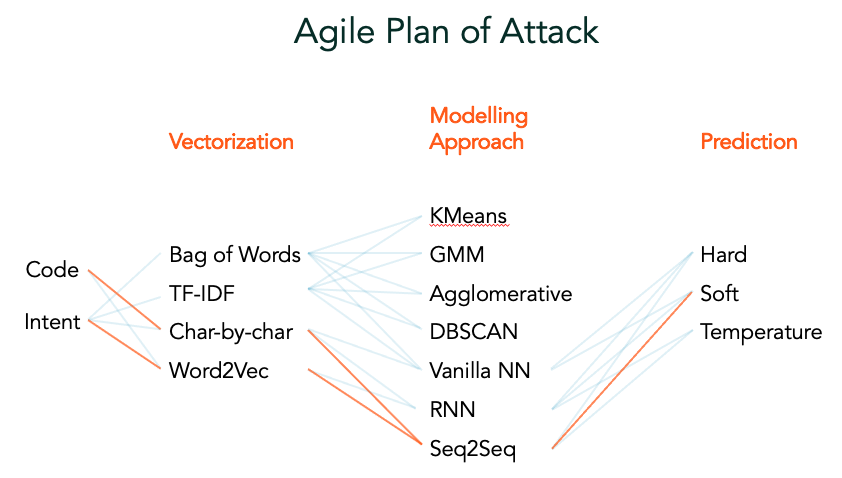

For brevity and clarity of this report, below I will only outline the process for the most successful modelling approach. 

However, a large amount of work was done in assessing these other approaches in terms of vectorization and applied model, and thus I have included a supporting notebook file named `alternative_modelling_approaches.ipynb` which includes samples of the work done in investigating other approaches.

The most effective approach was found to be the use of a Seq2Seq model. Much of the style of implementation I will show below is influenced by a Seq2Seq article by Francois Chollet [[7]](#References).

This is discussed in greater detail below.

# 7.0 - Preprocessing
[[Back To TOC]](#Table-of-Contents)


We discussed the input and target data above, and recall that both are currently in the form of text data of various length. This is not a conducive format for conducting modelling.

I will have to process the data to break it into smaller fragments of text, and then vectorize the data so that it can be interpretted in modelling.

I'll start by recalling the dataframe to be worked with.

In [18]:
df = conala_train_df
df.head()

,intent,rewritten_intent,snippet,question_id
0,How to convert a list of multiple integers int...,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))",41067960
1,How to convert a list of multiple integers int...,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))",41067960
2,how to convert a datetime string back to datet...,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...,4170655
3,Averaging the values in a dictionary based on ...,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items...",29565452
4,zip lists in python,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])",13704860


## 7.1 - Separating Input and Target
[ Back to TOC](#Table-of-Contents)

In this dataframe the input data and target data have not been separated. I'll separate the two at this point.

In [19]:
# Creating lists of text as the input and target data.
input_list=list(df["snippet"])
target_list=list(df["rewritten_intent"])

In [20]:
# Peek at the created lists
print(input_list[:10], end="\n\n")
print(target_list[:10])

['sum(d * 10 ** i for i, d in enumerate(x[::-1]))', "r = int(''.join(map(str, x)))", "datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')", '[(i, sum(j) / len(j)) for i, j in list(d.items())]', 'zip([1, 2], [3, 4])', "['hello{0}'.format(i) for i in a]", "re.sub('(?<!\\\\S)((\\\\S+)(?:\\\\s+\\\\2))(?:\\\\s+\\\\2)+(?!\\\\S)', '\\\\1', s)", 'df.div(df.sum(axis=1), axis=0)', 'map(lambda t: (t[1], t[0]), mylist)', '[(t[1], t[0]) for t in mylist]']

["Concatenate elements of a list 'x' of multiple integers to a single integer", 'convert a list of integers into a single integer', "convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'", 'get the average of a list values for each key in dictionary `d`)', 'zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list', "prepend string 'hello' to all items in list 'a'", 'regex for repeating words in a string `s`', 'normalize a pandas dataframe `d

## 7.2 - Preparing for Tokenization
[ Back to TOC](#Table-of-Contents)

In NLP, a token is a "term" occurring in a dataset[[5]](#References). These terms are patterns of text which present themselves, and are a way of representing the text in terms of the number of times a token occurs rather than as a string object. Tokenizing allows for numerical representation of text data, and breaks down a string into smaller components. 

In my approach, through the EDA activities conducted above combined with my experiential knowledge in applying code, I have come to understand that in code `snippet`, individual characters can carry significant importance or meaning. For this reason, I decided to work towards tokenizing the code fields on a character-by-character basis. 

On the other hand, the `rewritten_intent` field does not present in the same way. This field produces a mix of information. On one hand, it is largely composed of regular english, in which we would commonly tokenize strings on a word-by-word basis since words in english carry more meaning compared to individual characters. On the other hand, specific to the data I am employing, there is quite frequent use of non-letter characters to convey an intent. Brackets `(,)` and quotation marks `"` are commonly found in this field and should actually be quite useful as an output token. 

To summarize, I determined that: 
- `snippet` should be tokenized character-by-character
- `intent` should be tokenized word by word, but include tokens for special characters.

### 7.2.3 - Helper Functions
[ Back to TOC](#Table-of-Contents)

In preparation for the preprocessing, I understood that the processing being conducted would likely need to be applied multiple times. This turned out to be true when I attempted modelling with multiple data inputs (such as the mined data which is not included in this report). Additionally, if in the future new data is to be introduced for training of the model, these helper functions will be helpful to avoid redundancy, but also to ensure that the same processing is being applied.

#### 7.2.3.1 - List Splitting Helper Function
[Return to TOC](#Table-of-Contents)

The following function `split_to_list_of_words` provides a standard process by which to create a list of sentences which are themselves expressed as a list of tokens. These tokens will include special characters which are useful to my model. 

Regular expressions are used to find and manipulate characters.

A docstring has been provided for additional detail about the function.

This helper function will be applied to the `target_list`. 

In [21]:
# import the Regular Expression library
import re

def split_to_list_of_words(li):
    '''
    Takes a list of sentences (li) -> returns a list of lists, each inner list is words 
    in a sentence (new_list).
    -----
    This function first applies a lowercase method so that letters are 
    considered the same regardless of case. If an error is presented at this 
    step it is ignored because the handling of special characters in this case
    needs to be resilient given we are working with code.
    
    Secondly, the function will find instances of special characters, and insert a
    space character (' ') on either side of it in preparation for the next step.
    
    The function will then split each sentence in the list into words,
    based on the presence of any spaces.
    
    The result is tokens which are words, and special characters, expressed
    as a list of lists.
    '''
    
    # Create new list which will be the returned at end of function
    new_list = list()
    
    # Iterate through the provided list of sentences, li
    for i in li:
        # Try to lowercase the sentence
        try:
            i = i.lower()
        # Special characters interacts oddly with `.lower()` sometimes
        # use the exception so that the function is not stopped.
        except:
            pass
        
        # Add spaces on either side of special chars
        try:
            i = re.sub('([^a-zA-Z0-9 \d])', r' \1 ', i) # Add spaces between special chars
        except:
            pass # If this fails, move on. 
        
        # Split the sentence by spaces.
        i = list(i.split(' '))
        
        # Add this processed list of words to the new_list var, to be returned.
        new_list.append(i)
        
    return new_list

## 7.3 - Vectorizing Text Data
[[Back To TOC]](#Table-of-Contents)

Now that the data has been broken into its tokens, it should be vectorized accordingly in preparation for training of the seq2seq model. There's a little more preparation to do before transforming though. This includes creating a vocabulary for both the input space and also for the output space. And also adding a start and stop charactder to the target lists.

In [22]:
# Instantiate variable names for extra clarity.
# and so they can be available to append with results. 
input_texts = [] # will be a list of text fields 
target_texts = [] # will be a list of lists with target tokens repping intent
input_characters = set() # will be a set of unique characters in inputs
target_tokens = set() # will be a set of unique target tokens in outputs

In [23]:
# create a list of words from target_list with helper func from above.
target_list = split_to_list_of_words(target_list)

In [24]:
# Create lists of text by record
for input_text, target_text in zip(input_list, target_list):
    
    # Start target sentences with 't' and end with '\n' through list methods
    # This helps the decoder understand when a sentence starts and ends.
    target_text.insert(0, "\t")
    target_text.append("\n")
    
    # Add record to the result variables. 
    input_texts.append(input_text) # Unchanged, but reinstantiated for clarity. 
    target_texts.append(target_text)
    
    # Input vocab from input text list.
    for char in input_text:
        if char not in input_characters: # If it's not in vocab
            input_characters.add(char) # Then add to the set.
            
    # Target vocab from target text list 
    for token in target_text:
        if token not in target_tokens: # If it's not in vocab
            target_tokens.add(token) # Then add to the set.

In [25]:
# Peek at output
print("sample of input:\n\n", input_texts[:3], end="\n\n")
print("sample of target:\n\n", target_texts[:3], end="\n\n")
print("sample of input chars:\n\n", list(input_characters)[:10], '\n\n')
print("sample of target tokens:\n\n", list(target_tokens)[:10])

sample of input:

 ['sum(d * 10 ** i for i, d in enumerate(x[::-1]))', "r = int(''.join(map(str, x)))", "datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')"]

sample of target:

 [['\t', 'concatenate', 'elements', 'of', 'a', 'list', '', "'", 'x', "'", '', 'of', 'multiple', 'integers', 'to', 'a', 'single', 'integer', '\n'], ['\t', 'convert', 'a', 'list', 'of', 'integers', 'into', 'a', 'single', 'integer', '\n'], ['\t', 'convert', 'a', 'datetime', 'string', 'back', 'to', 'a', 'datetime', 'object', 'of', 'format', '', "'", '', '%', 'y', '-', '', '%', 'm', '-', '', '%', 'd', '', '%', 'h', ':', '', '%', 'm', ':', '', '%', 's', '.', '', '%', 'f', "'", '', '\n']]

sample of input chars:

 [',', '4', '%', '"', '|', ']', '`', 'I', '#', 'H'] 


sample of target tokens:

 ['', ',', 'bins', '15', 'forceescape', 'calculate', 'multiline', 'emaillist', 'spark', 'interleave']


At this step, we have the two vocabularies for input and target, and we have prepared each of the input and target texts for vectorization, input by character, and target by word and special character.

Now to get organized I'll check some characteristics. I'll sort the vocabularies, check the number of tokens in each, and determine what the maximum length of inputs and targets are. 

In [26]:
# Get simple size metrics, and sort vocabs alphabetically.
input_characters = sorted(list(input_characters))
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_tokens)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

# Output findings of above.
print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 2288
Number of unique input tokens: 98
Number of unique output tokens: 2433
Max sequence length for inputs: 232
Max sequence length for outputs: 98


I also need to create a means by which to relate the vectorized text back to its original text form. To do that, I created a pair of dictionaries.

In [27]:
# Creates a vocabulary dictionary, with token and enum int.

# Create in input dic with loop to provide unique integer for a char 
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])

# Create a target dic with loop to provide unique integer for a token
target_token_index = dict([(token, i) for i, token in enumerate(target_tokens)])
# Add space char to end of dictionary, since text was split on space. 
target_token_index.update( {' ' : len(target_token_index)} )

Now the `input_token_index` can convert input characters to a unique integer, and `target_token_index` can convert target tokens to a unique integer.

The Seq2Seq model uses two neural networks to generate an output. The first is called an encoder, and the second is called a decoder. The output of the first will be the input to the second. In the modelling section below I will discuss in more detail.

At this step, I'll set up the shape and datatype for the the encoder and decoder.

In [28]:
# Sets up the necessary shapes of the arrays for 
# for each of the input/output data with zeroed arrays.
# shape is based on the number of tokens in vocab, max length of text seq
# and the number of records.

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

Now on to the actual vectorization with 1-hot encoding.

In [29]:
# Loop through the corpus, which is list of sentences for input,
# and a list of sentences (sentences as lists of words) for the target.
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    
    # loop through chars in input text, 1 hot encode character by character using 
    # the dictionary.
    # The resulting array will be the encoder input data.
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    
    # loop through tokens in target text, 1 hot encode token by token using the 
    # dictionary.
    # result is the decoder input data.
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0

I now have the vectorized input data for my model.

# 8.0 - Modelling and Analysis
[[Back To TOC]](#Table-of-Contents)


Recall that through the agile data modelling process, I was found Seq2Seq modelling yielded the best results for my goals. In this section I will discuss Seq2Seq and implement it. 

## 8.1 - Seq2Seq Discussion
[[Back To TOC]](#Table-of-Contents)

A Sequence-to-Sequence model (Seq2Seq) model is often applied when taking one input sequence and attempting to generate an output sequence [[8]](#References). This techenique implements a series fo Recurrent Neural Networks (RNN). 

Firstly, a "stack" of RNNs acts as the encoder. It processes the input data and at the tail end of the stack we recover a "context vector" which is the state at the final layer. The output data of this is discarded. 

Following the encoder, another "stack" of RNNs acts as the decoder. This is trained to take the context vector from the encoder, and use this as a starting point for predicting samples in the output sequence. The decoder is trying to predict the next token in the target sequence as if it were one "time-step" ahead of the current token in the target sequence. 

I've drafted a simplified representation of this technique to help visualize what is occurring.

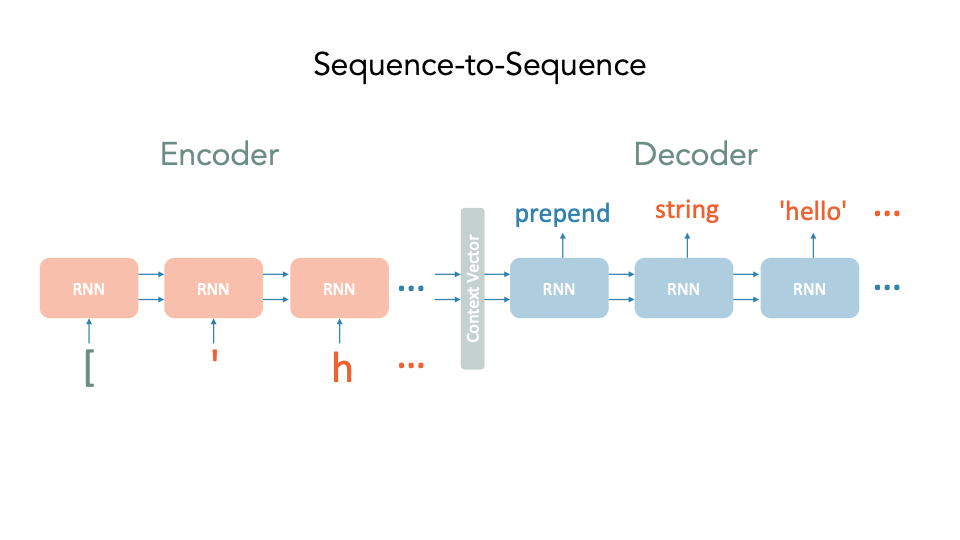

## 8.2 - Implementing Seq2Seq
[[Back To TOC]](#Table-of-Contents)

In this section, I'll build out the Seq2Seq model as discussed. I'll reiterate that credit for implementing this is due to Francois Chollet's article regarding character-by-character Seq2Seq models [[6]](#References). However, my approach differs as the output space of my model includes word tokens and not just characters.  

First, since the model is implemented using `keras` from the `tensorflow` library, I'll import both of these.

In [30]:
import tensorflow as tf
from tensorflow import keras

Now I'll instanatiate a number of variables for configuring the model. If these need to be tuned in the future, they can be tweaked one time in this cell. 

In [31]:
# Initializing configuration variables.
batch_size = 128  # Set the batch size for training steps
epochs = 20  # Set number of epochs to train
latent_dim = 256  # Set the dimensionality of the encoder
num_samples = 10000  # Maximum number of samples to train on based on input length.

Now I can explicitly implement each layer of the RNNs with `keras`.

In [32]:
# Initializing the input sequence
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens)) # dimension based on input vocab size
encoder = keras.layers.LSTM(latent_dim, return_state=True) # set deminsonality of encoder lstm.
encoder_outputs, state_h, state_c = encoder(encoder_inputs) # Save the output and states from encoder

# Recall that seq2seq only requires the states and not the output of the RNN stack.
encoder_states = [state_h, state_c]

# Initialize the decoding sequence
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens)) # dimension based on target vocab.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
# The decoder will use `encoder_states` as initial state.
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax") # softmax for simpler summing of output probs.
decoder_outputs = decoder_dense(decoder_outputs)

# Initialize the model which will take `encoder_input_data` & `decoder_input_data`
# and outputting `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

The model is built and compiled, it now just needs to be trained on our data. 

## 8.3 - Training the Seq2Seq Model
[[Back To TOC]](#Table-of-Contents)

I've previously conducted training of the model, with the calibrated settings of the previous section i.e. 20 epochs. The model would likely continue to benefit from additional epochs of training, however given the time sensitivity of submitting this report, I've considered this to be a next step for the future, and stopped the model a bit earlier. 

I've saved the model, and included it in the `models` folder. The model is named `s2s`. 

The below cell will load this pre-trained model if available as stated above, else it will train the model from scratch.

In [33]:
# import os library to check if model file exists
import os

# time execution in the case that training is conducted.
%time

# Compile the model.
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

# if the model file does not exist, conduct training and save file.
if not os.path.exists('models/s2s'):
    model.fit(
        [encoder_input_data, decoder_input_data],
        decoder_target_data,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
    )
    # Save model
    model.save('models/s2s')

# if the file exists, skip the training
else:
    print("No need to train, model can be loaded." \
          " Move on to next step...")
    

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 18.8 µs
No need to train, model can be loaded. Move on to next step...


With the model already trained, I need to now load it and construct it, as well as create the prediction function. 

In [34]:
# Load the model and set up encoder/decoders.
model = keras.models.load_model("models/s2s")

encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_3")
decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_4")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

In [35]:
# Creating a dictionary for the reverse direction, get a character
# based on the unique integer.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

## 8.4 - Predicting a Target Sequence
[[Back To TOC]](#Table-of-Contents)

Now I'll be creating the function that will use the outputs of the decoder to predict the next token in the target sequence.

This function is aptly named as `decode_sequence_prob()`. I initially implemented a similar function which simply took a hard prediction of the token with the greatest output probability, however this would often converge to repeatedly guessing certain sequences. The use of a random choice implemented in this function combats this effect.

The docstring provided in the function gives more detail about it.

In [36]:
# Creating the function which will 'decode' or predict the target sequence.
def decode_sequence_prob(input_seq):
    '''
    Takes list of arrays (input seq) -> returns a string (new_list) which is the predicted target sequence.
    -----
    This function employs a previously trained seq2seq model (encoder_model, decoder_model)
    and runs a prediction based on the input seq. 
    
    The decoder output produce an array of probabilities corresponding to the target token dictionary. 
    
    This function will make a random choice from that dictionary, but weighted with the probabilities
    output by the decoder. 
    '''
    
    # getting the context vector
    states_value = encoder_model.predict(input_seq)

    # Initializing the target sequence, beginning with 0s. 
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Make the first character a tab. This was what I used to indicate start of a document.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Loop for multiple sequences to predict.
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        predict_proba, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_char = np.random.choice(target_tokens, 1, p = predict_proba.flatten())[0]
        sampled_token_index = target_tokens.index(sampled_char)
        
        decoded_sentence = decoded_sentence + ' ' + sampled_char

        # Exit condition: either hit max length
        # or a stop character is found.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence

With this function implemented, it can be test on the first 5 documents of the input data. I run this below

In [39]:
# Testing probability selection function

# Test for the first 5 documents in the training set
for seq_index in range(5):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence_prob(input_seq) # run prob decode function.
    print("-----") # separate the outputs with this
    print("Input sentence:", input_texts[seq_index], '\n')
    print("Decoded sentence:", decoded_sentence, '\n')
    print("Actual intent:", ' '.join(target_texts[seq_index]),'\n') # Provide this for comparison


-----
Input sentence: sum(d * 10 ** i for i, d in enumerate(x[::-1])) 

Decoded sentence:  sort list strings ` numerical `  `  `  `  in pandas - 
 

Actual intent: 	 concatenate elements of a list  ' x '  of multiple integers to a single integer 
 

-----
Input sentence: r = int(''.join(map(str, x))) 

Decoded sentence:  sort list 1d in code  and  `  
 

Actual intent: 	 convert a list of integers into a single integer 
 

-----
Input sentence: datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f') 

Decoded sentence:  delete list  in save  `  ` special in  within ' ` 
 

Actual intent: 	 convert a datetime string back to a datetime object of format  '  % y -  % m -  % d  % h :  % m :  % s .  % f '  
 

-----
Input sentence: [(i, sum(j) / len(j)) for i, j in list(d.items())] 

Decoded sentence:  regular select of of  ' in beautiful 
 

Actual intent: 	 get the average of a list values for each key in dictionary  ` d `  )  
 

-----
Input sentence: zip([1, 2], [3, 4]) 


## 8.5 - Prediction for Custom Data
[[Back To TOC]](#Table-of-Contents)

It would also be useful if the model could be applied to inputs which do not come from the training set. Accordingly, I created a function which can handle the same workflow with a custom input string, intended to be code.

In [40]:
def demo(demo_list):
    '''
    Takes list of documents (demo_list) -> returns None
    -----
    This function employs the decode_sequence_prob function to predict an output sequence 
    for each document in the input list. 
    
    The function will print the results for each document included in the input list.
    '''
    
    # Sets up the array shapes for input data with zeroed arrays.
    encoder_input_data_demo = np.zeros(
        (len(demo_list), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
    )

    for i, demo in enumerate(demo_list):
        for t, char in enumerate(demo):
            encoder_input_data_demo[i, t, input_token_index[char]] = 1.0

    for demo_index in range(len(demo_list)):
        input_seq = encoder_input_data_demo[demo_index : demo_index + 1]
        decoded_sentence = decode_sequence_prob(input_seq) # change decode func
        print("-")
        print("Input sentence:", demo_list[demo_index])
        print("Decoded sentence:", decoded_sentence)

I'll test the function now: 

In [41]:
# Create a list of documents to run prediction on
demo_ls = ["print('hello world')", "for i in range(1,10)"]

demo(demo_ls)

-
Input sentence: print('hello world')
Decoded sentence:  get the possible dataframe   ` , contains a module the list path of variable the  tuple column string
-
Input sentence: for i in range(1,10)
Decoded sentence:  int the  of list  ` l `  _ index `  ` single 



# 9.0 - Discussion
[[Back To TOC]](#Table-of-Contents)


# 10.0 - Next Steps
[[Back To TOC]](#Table-of-Contents)


# Conclusion
[[Back To TOC]](#Table-of-Contents)


# References
[[Back To TOC]](#Table-of-Contents)

[1] Is it possible to translate Python code to English? September 18, 2018. Quora. [online] Available at: https://www.quora.com/Is-it-possible-to-translate-Python-code-to-English

[2] Stack Overflow. 2020. [online] Available at: https://stackoverflow.com

[3] Conda. 2020. [online] Available at: https://docs.conda.io/projects/conda/en/latest/index.html

[4] CoNaLa: The Code/Natural Language Challenge. 2020. CoNaLa: The Code/Natural Language Challenge. [online] Available at: <https://conala-corpus.github.io/#dataset-information> [Accessed 13 November 2020].

[5] Tokenization. 2008, Cambridge University Press. [online] Available at: https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html

[6] Manifesto for Agile Software Development. 2001. Kent Beck et al. [online] Available at: https://agilemanifesto.org/

[7] Character-level recurrent sequence-to-sequence model. 2020/04/26. Francois Chollet. [online]. Available at: https://keras.io/examples/nlp/lstm_seq2seq/

[8] A ten-minute introduction to sequence-to-sequence learning in Keras. 2017/09/29. Francois Chollet. [online]. Available at: https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

[x] Learning to Mine Aligned Code and Natural Language Pairs from Stack Overflow. arXiv:1805.08949v1. 23 May 2018. Pengcheng Yin, Bowen Deng, Edgar Chen, Bogdan Vasilescu, Graham Neubig, Carnegie Mellon University, USA. [online]. Available at: https://arxiv.org/pdf/1805.08949.pdf

[x] Neural Machine Translation (seq2seq) Tutorial. 2017. Minh-Thang Luong and Eugene Brevdo and Rui Zhao. [online]. Available at: https://github.com/tensorflow/nmt



[x] models.word2vec – Word2vec embeddings. 2020/11/04. Radim Řehůřek. [online]. Available at: https://radimrehurek.com/gensim/models/word2vec.html
